In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fifa21_male2.csv')

In [3]:
df

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [5]:
pd.set_option('display.max_rows', 300) # increase how may rows to display to see sums for all columns 
df.isna().sum()

ID                      0
Name                    0
Age                     0
OVA                     0
Nationality             0
Club                   23
BOV                     0
BP                      0
Position              413
Player Photo            0
Club Logo              23
Flag Photo              0
POT                     0
Team & Contract         0
Height                  0
Weight                  0
foot                    0
Growth                  0
Joined                 58
Loan Date End       16215
Value                   0
Wage                    0
Release Clause          0
Contract                0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                58
Skill                   0
Dribbling               0
Curve                  58
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed

In [6]:
df.describe()

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,...,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,...,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,...,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,...,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,...,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,243911.000000,29.000000,72.000000,72.000000,76.000000,9.000000,306.000000,65.000000,64.000000,65.000000,...,14.000000,14.000000,1812.000000,390.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,259105.000000,53.000000,93.000000,93.000000,95.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,93.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


## Data Cleaning

In [7]:
# consolidate namings
# check for null values
# check for type issues in columnns
# check if I should reset my index reference 

df.columns = [ col.lower().replace(' ', '_') for col in df.columns]
df = df.set_index('id')

In [8]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes('number')

In [9]:
df_cat.columns

Index(['name', 'nationality', 'club', 'bp', 'position', 'player_photo',
       'club_logo', 'flag_photo', 'team_&_contract', 'height', 'weight',
       'foot', 'joined', 'loan_date_end', 'value', 'wage', 'release_clause',
       'contract', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'hits', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk', 'gender'],
      dtype='object')

In [10]:
df_num.columns

Index(['age', 'ova', 'bov', 'pot', 'growth', 'attacking', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength',
       'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'defending', 'marking',
       'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy'],
      dtype='object')

In [11]:
print(len(df_cat.columns))
print(len(df_num.columns))

52
54


In [12]:
df[['height', 'weight', 'foot', 'joined', 'value', 'wage', 'hits']] 

,height,weight,foot,joined,value,wage,hits
id,,,,,,,
2,"6'0""",181lbs,Left,"Jul 1, 2008",€625K,€7K,4
16,"5'10""",143lbs,Right,"Jul 19, 2014",€600K,€7K,4
27,"5'9""",161lbs,Right,"Jan 7, 2016",€1.1M,€15K,11
36,"5'11""",165lbs,Right,NaN,€0,€0,3
41,"5'7""",150lbs,Right,"Jul 16, 2018",€5.5M,€12K,149
...,...,...,...,...,...,...,...
259088,"6'6""",165lbs,Right,"Sep 29, 2020",€550K,€2K,5
259090,"5'10""",170lbs,Right,"Aug 20, 2020",€130K,€3K,5
259091,"5'9""",154lbs,Right,"Aug 20, 2020",€130K,€2K,3


In [13]:
df_1 = df.copy()

In [14]:
# convert height to cm numerical
def feet_inches_to_cm(val):
    feet_inches = val.split('\'')
    cm = float(feet_inches[0]) * 30.48
    cm += float(feet_inches[1].replace('"', '')) * 2.54
    return cm

df_1['height'] = df_1['height'].map(feet_inches_to_cm)

In [15]:
# convert weight to numerical
df_1['weight'] = df_1['weight'].map(lambda v: int(v.replace('lbs', '')))

In [16]:
# convert value and wage to numericals
def convert_to_eur(val):
    eur = 0
    if val == '€0':
        eur = 0
    elif 'K' in val:
        eur = float(val.replace('€', '').replace('K', '')) * 1000
    elif 'M' in val:
        eur = float(val.replace('€', '').replace('M', '')) * 1000000
    return eur
    
df_1['value'] = df_1['value'].map(convert_to_eur)
df_1['wage'] = df_1['wage'].map(convert_to_eur)

In [17]:
len(df_1['hits'].unique())

593

In [18]:
# convert hits to numerical
def hits_to_numerical(val):
    if  type(val) == str and 'K' in val:
        val = float(val.replace('K', '')) * 1000
    else:
        val = float(val)
    return val

df_1['hits'] = df_1['hits'].map(hits_to_numerical)

In [19]:
# dropping cols
df_1.drop(['name','nationality','player_photo', 'club_logo', 'flag_photo', 'team_&_contract', 'release_clause', 'contract', 'loan_date_end', 'gender', 'joined', 'foot', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'], axis=1, inplace=True)

In [20]:
df_1_cat = df_1.select_dtypes('object')
df_1_num = df_1.select_dtypes('number')

df_1_cat.columns

Index(['club', 'bp', 'position', 'w/f', 'sm', 'a/w', 'd/w', 'ir'], dtype='object')

In [21]:
# drop all nans
df_1.dropna(inplace=True)

## EDA

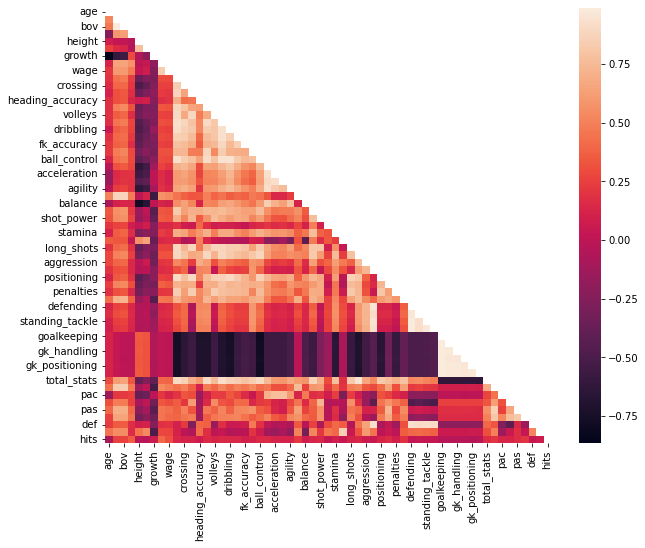

In [22]:
# check for correlation
mask = np.zeros_like(df_1.corr())
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_1.corr(), mask=mask, annot=False)
plt.show()

In [23]:
# small func to be able to get corr based on threshold
def check_correlation(df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [24]:
check_correlation(df_1_num, 0.9)

{'acceleration',
 'agility',
 'ball_control',
 'bov',
 'curve',
 'def',
 'defending',
 'dribbling',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'marking',
 'positioning',
 'skill',
 'sliding_tackle',
 'sprint_speed',
 'standing_tackle',
 'total_stats'}

In [25]:
df['bov'].corr(df_1['ova'])

0.9862741414750404

In [26]:
df['pot'].corr(df_1['ova'])

0.5864641874077412

In [27]:
compare = pd.DataFrame()
compare['pot'] = df['pot']
compare['ova'] = df['ova'] 
compare['diff'] = df['pot'] - df['ova'] 
compare['position'] = df['position']
compare['age'] = df['age']

compare.sort_values(by=['diff'], ascending=False).head(20)

,pot,ova,diff,position,age
id,,,,,
257793,80,54,26,LM CAM,16
258315,86,60,26,CB LB,17
259074,79,53,26,CB,17
258490,84,59,25,CB,17
243491,82,57,25,CAM LM ST,16
256598,78,53,25,CAM CM,17
248856,81,56,25,CM,17
256832,83,58,25,CAM CM LM,16
247025,76,51,25,CM,16


In [28]:
compare.sort_values(by=['diff'], ascending=True).head(20)

,pot,ova,diff,position,age
id,,,,,
164945,70,71,-1,CB,28
203754,65,65,0,CDM CM,29
203741,73,73,0,LB,28
203736,73,73,0,ST,28
203733,66,66,0,CM CDM,28
203725,72,72,0,RM LM,26
203699,70,70,0,ST,31
203672,70,70,0,ST RW CF,28
203668,73,73,0,ST,29


In [48]:
compare['age'].corr(compare['diff'])

-0.8502041946130307

In [30]:
df['age'].corr(df_1['pot'])

-0.24923424854541854

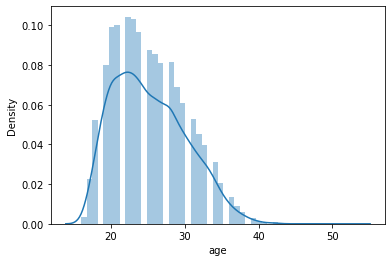

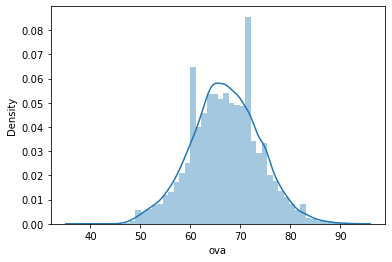

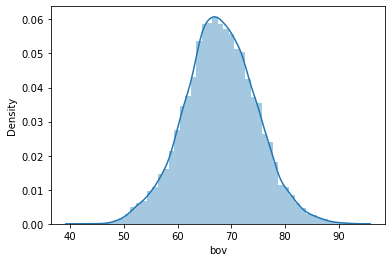

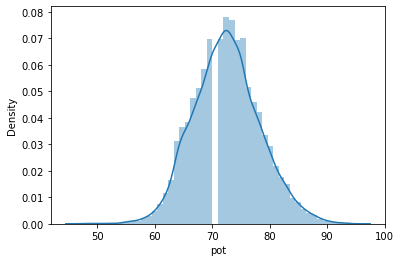

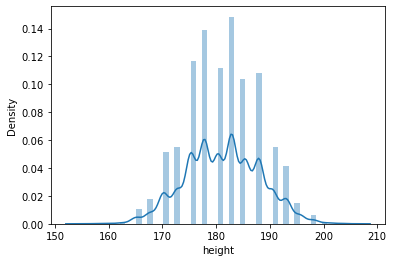

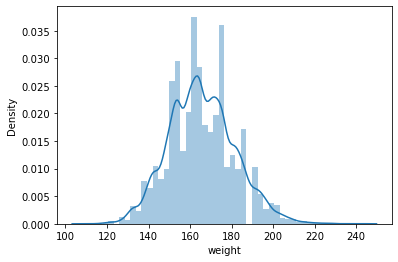

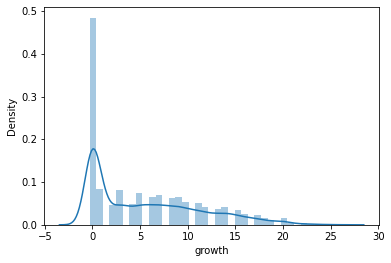

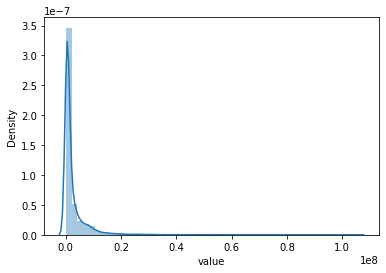

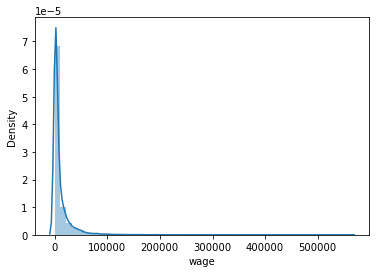

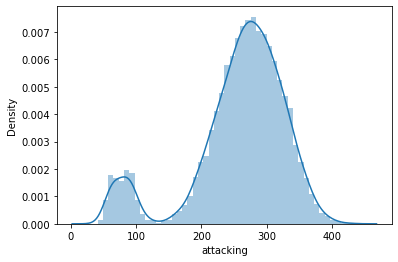

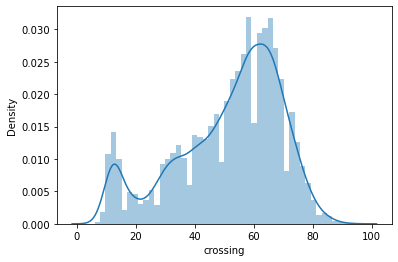

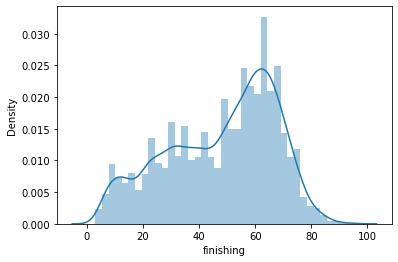

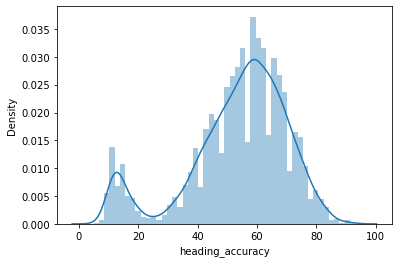

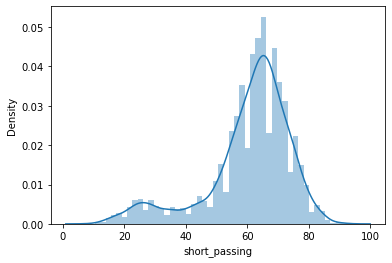

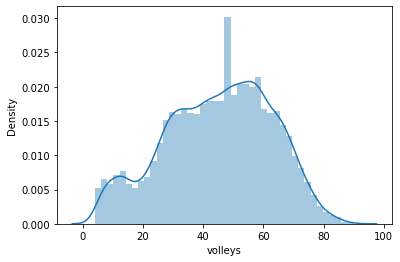

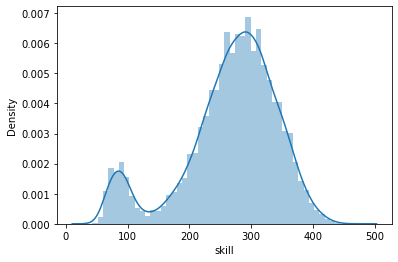

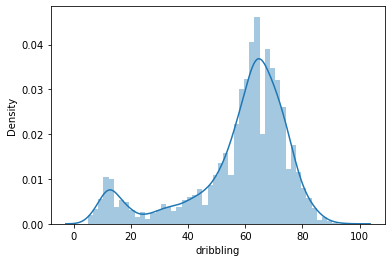

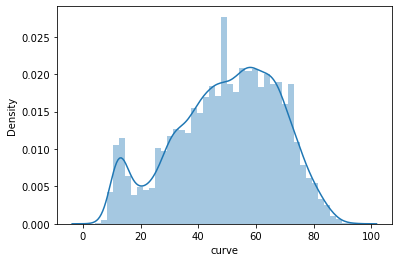

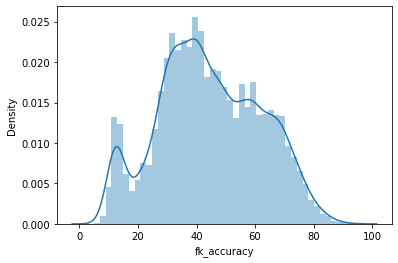

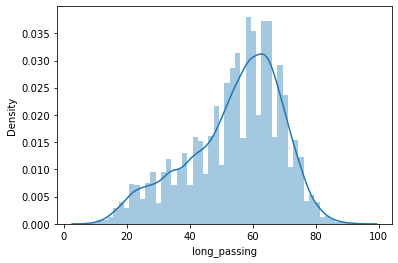

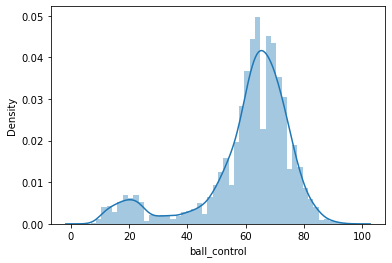

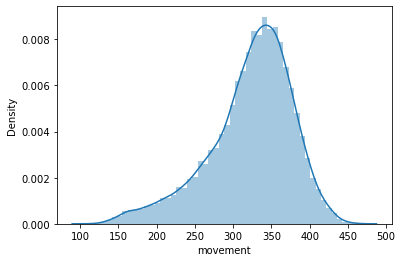

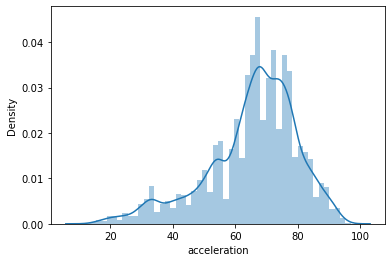

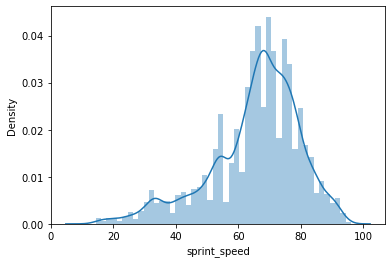

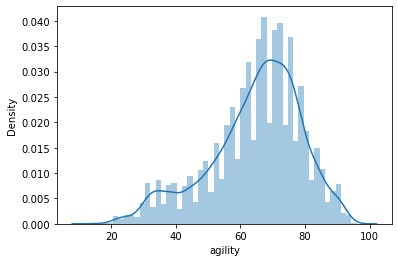

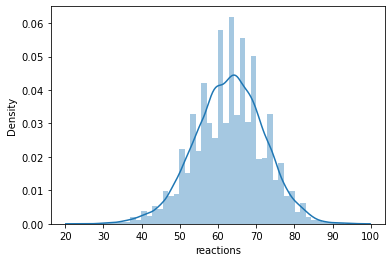

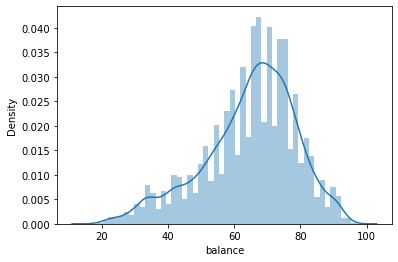

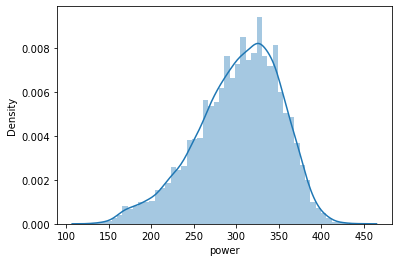

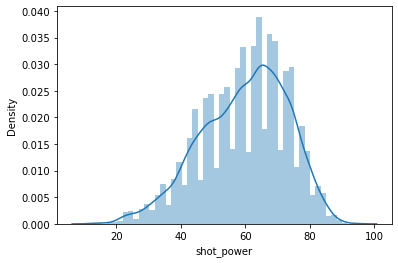

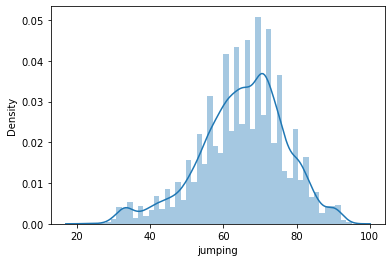

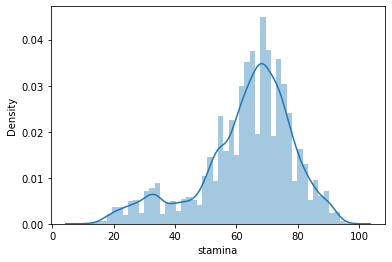

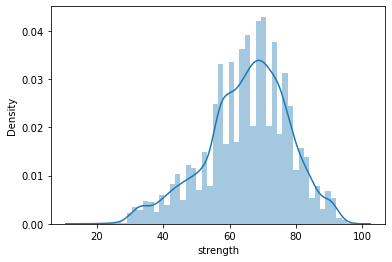

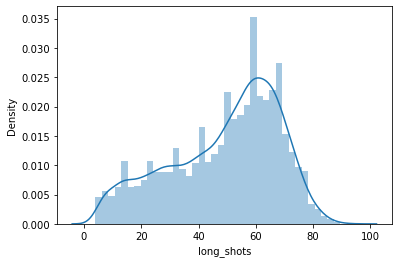

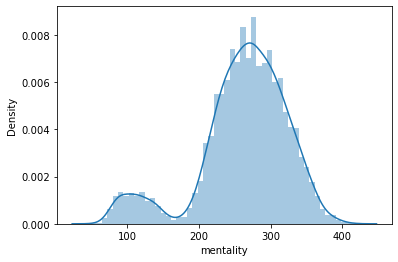

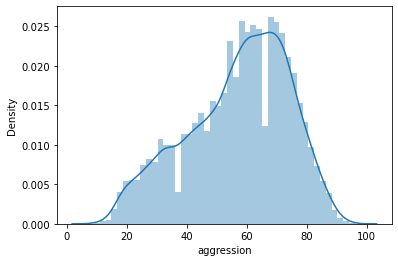

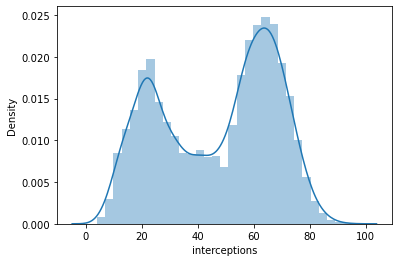

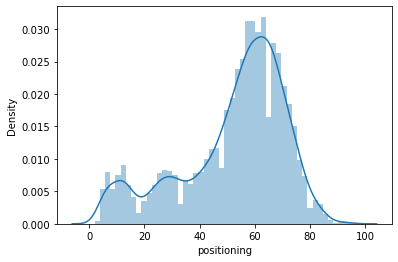

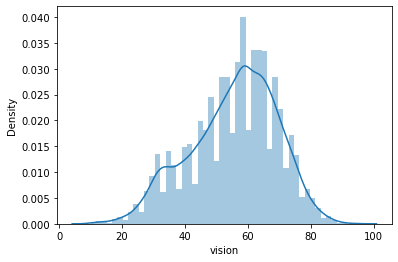

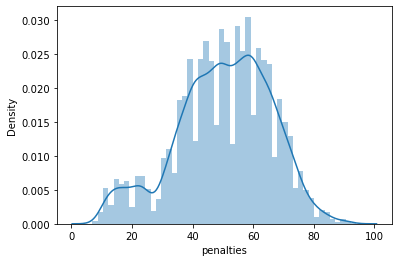

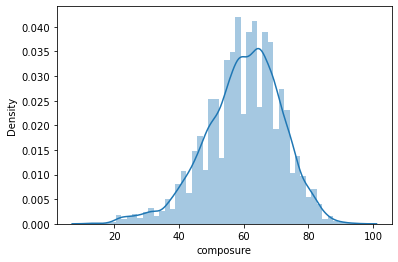

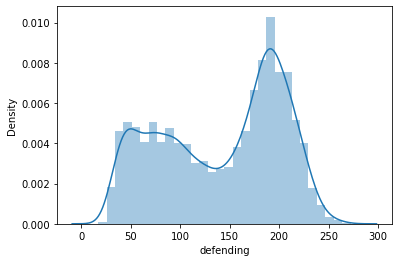

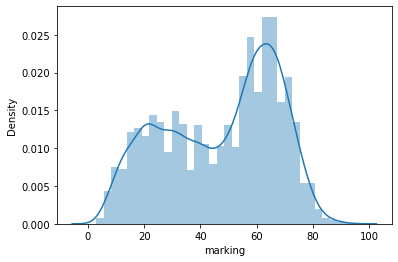

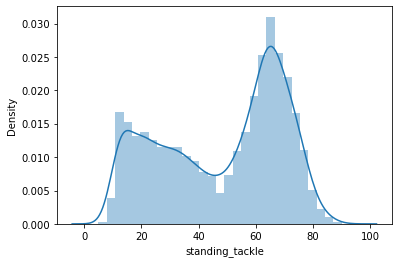

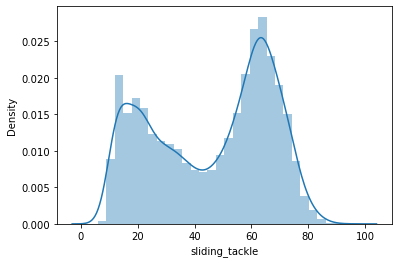

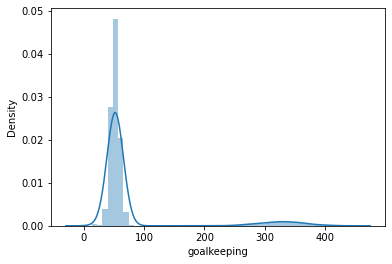

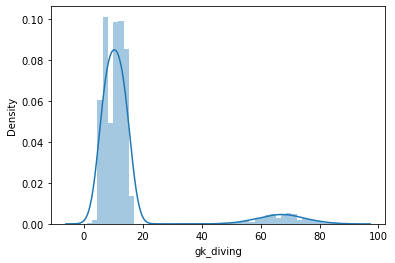

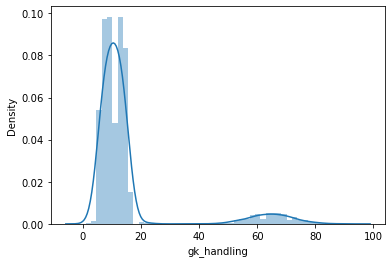

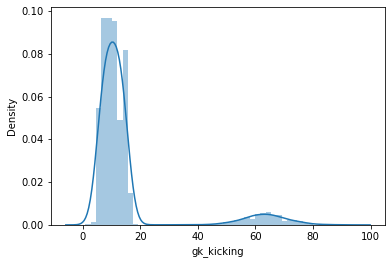

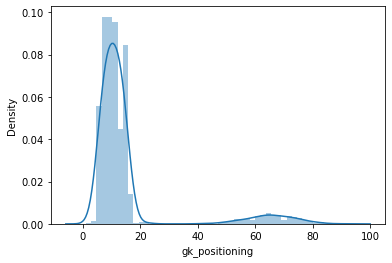

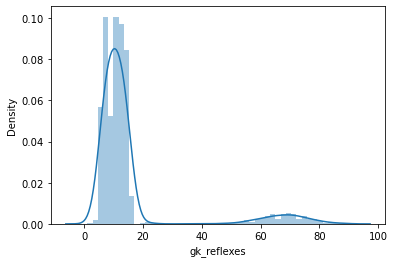

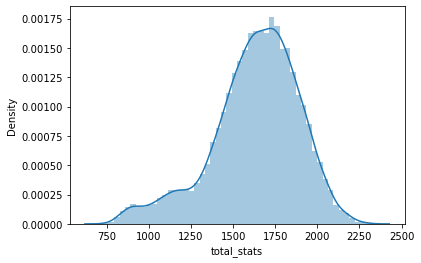

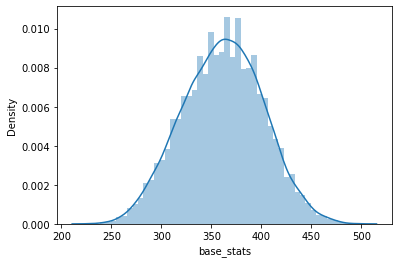

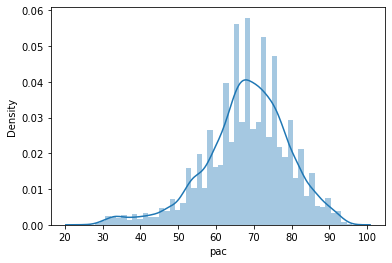

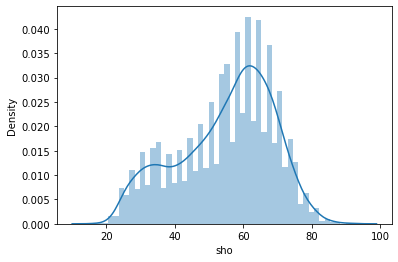

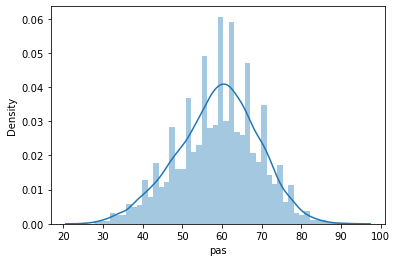

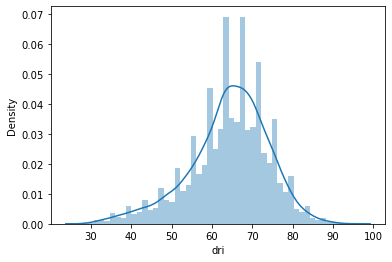

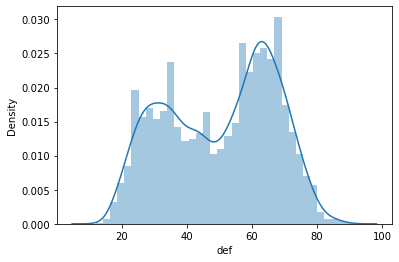

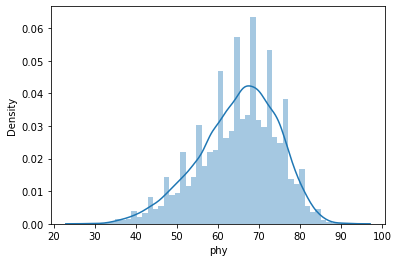

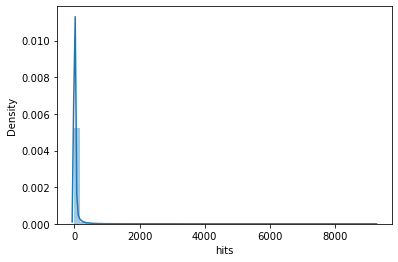

In [31]:
# check for distributions on numericals
for column in df_1_num.columns:
    sns.distplot(df_1_num[column])
    plt.show()

##  Feature Engineering

In [32]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [33]:
df_1_bx, _ci = boxcox_transform(df_1)

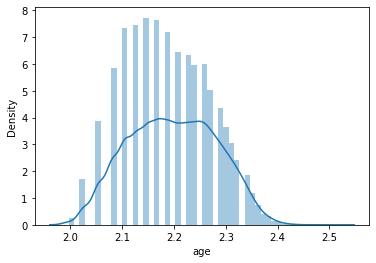

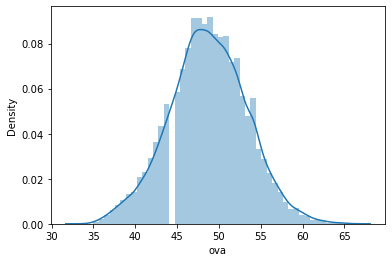

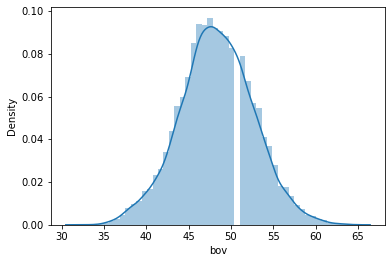

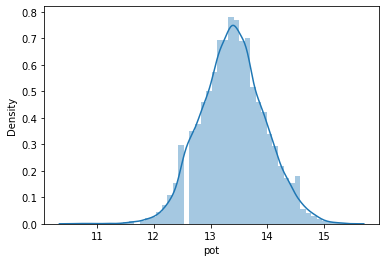

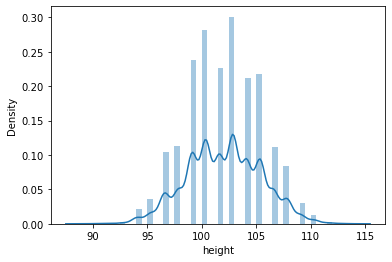

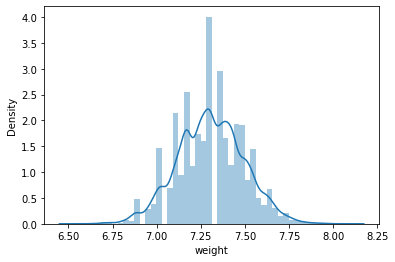

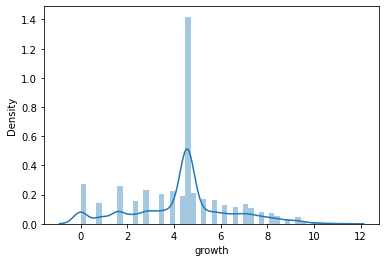

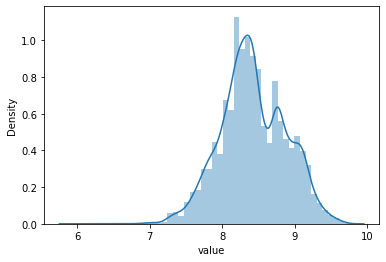

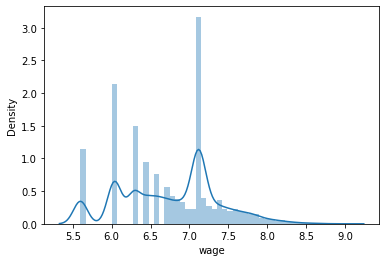

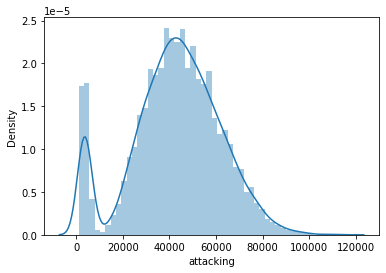

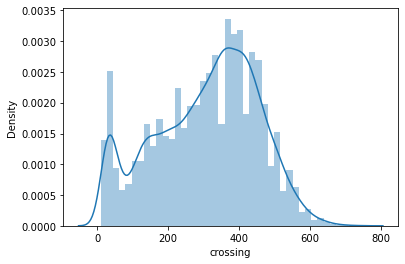

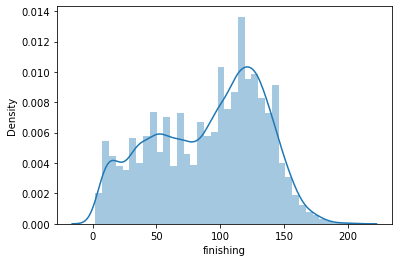

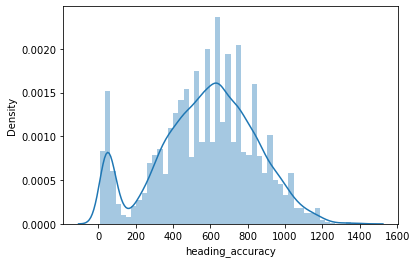

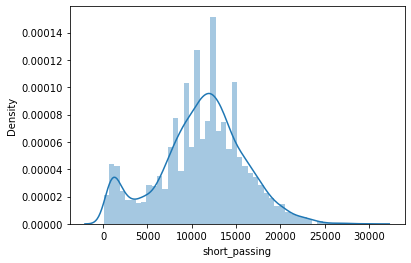

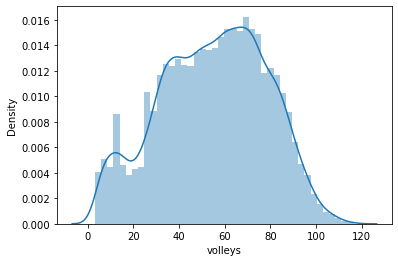

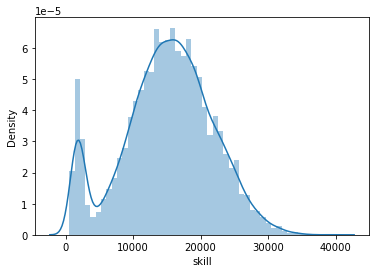

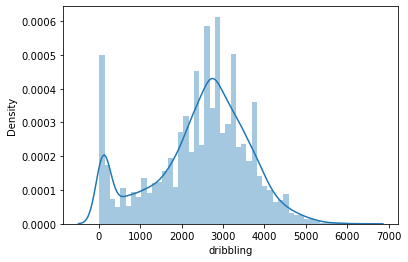

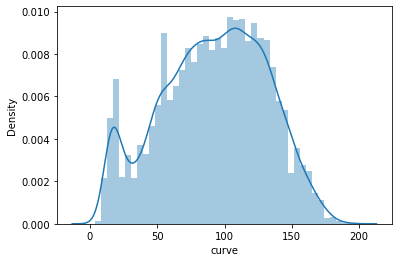

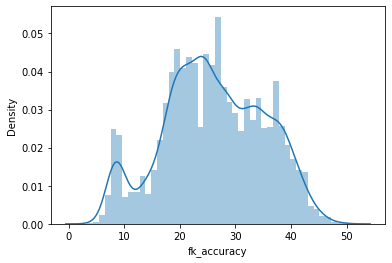

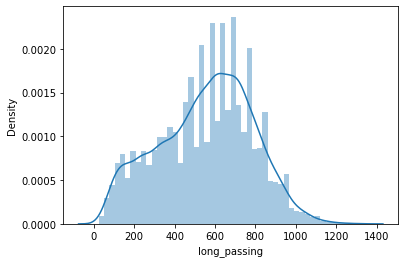

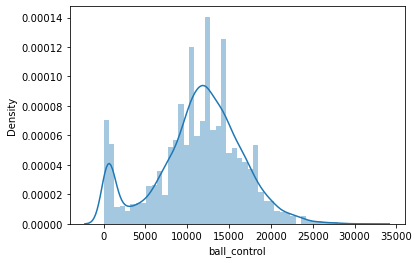

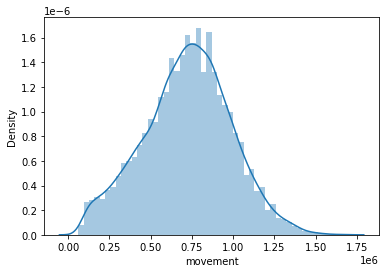

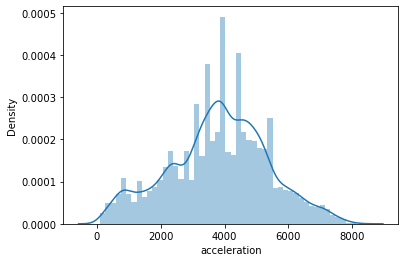

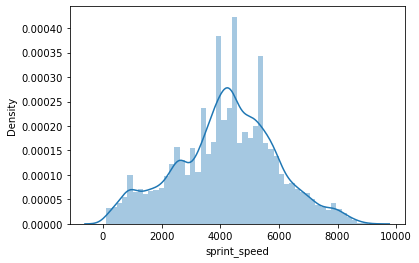

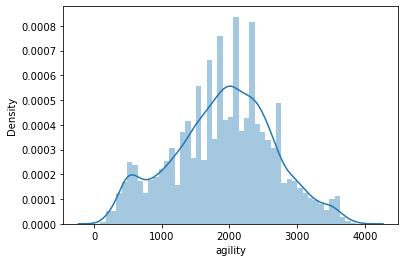

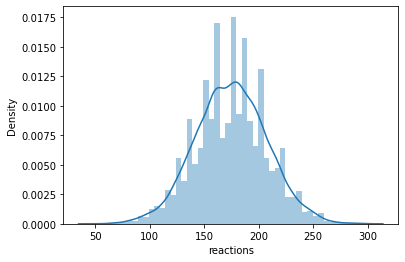

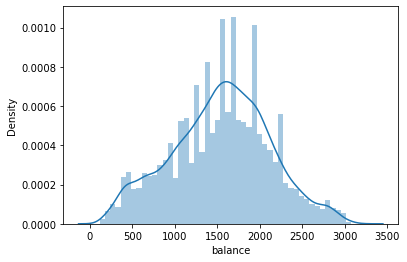

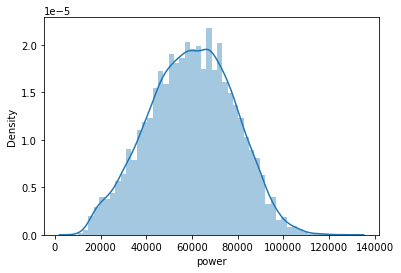

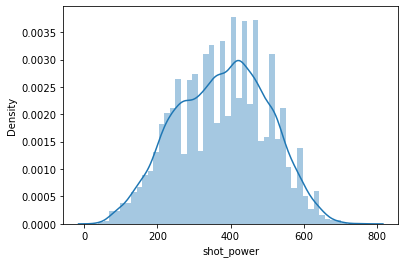

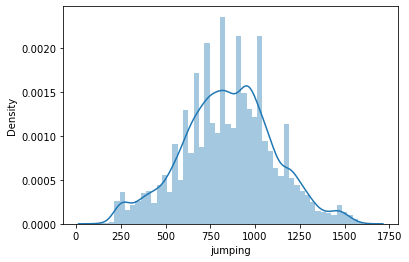

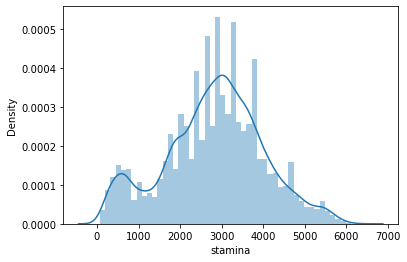

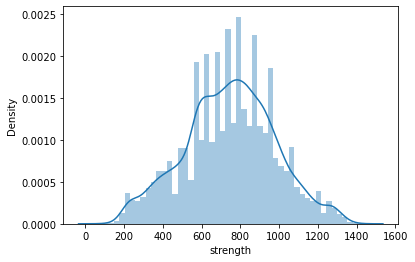

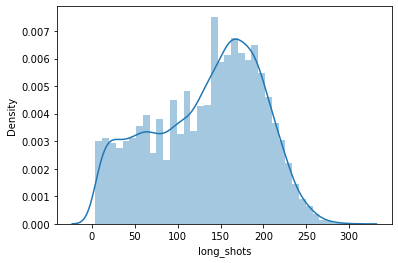

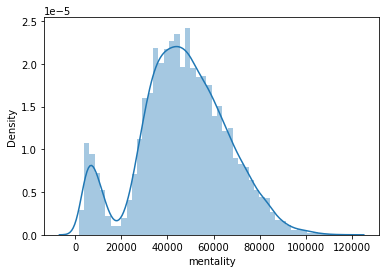

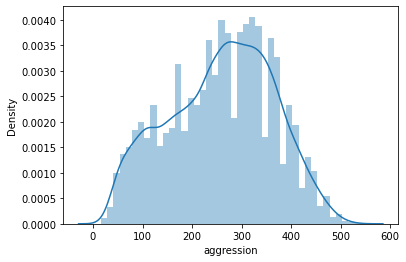

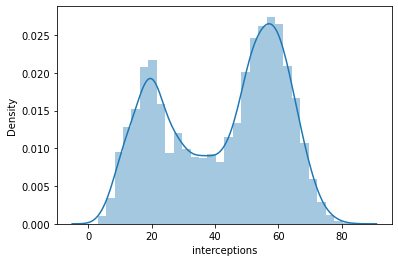

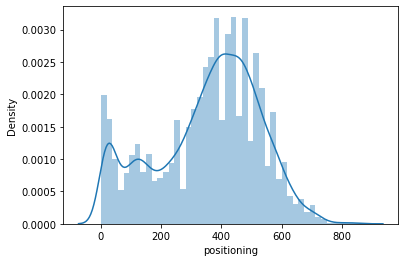

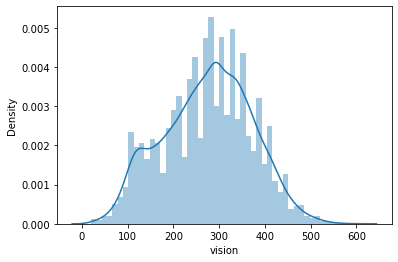

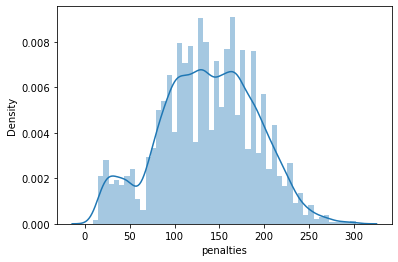

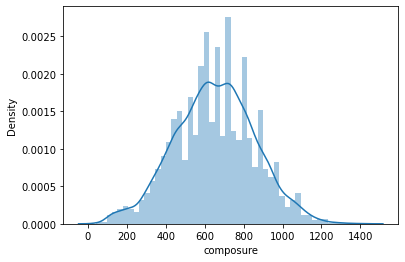

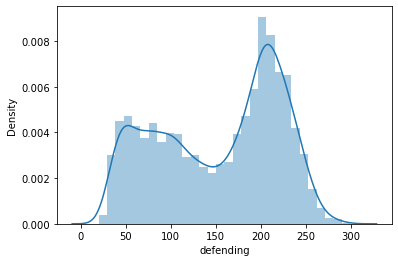

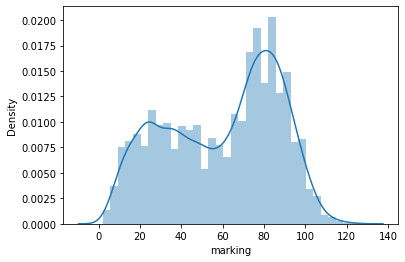

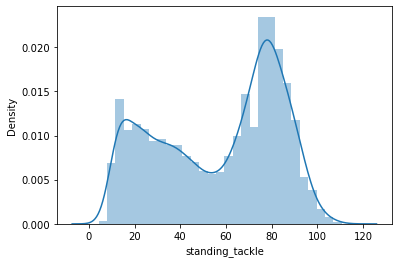

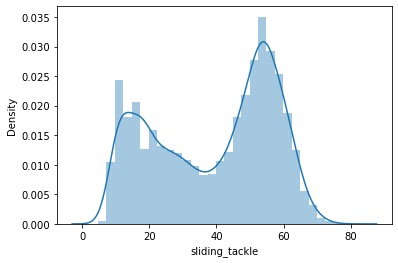

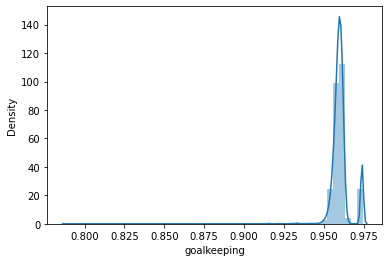

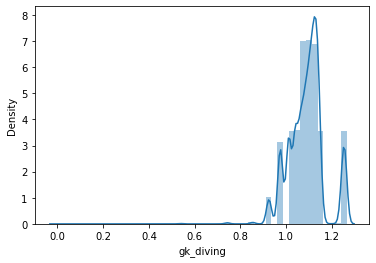

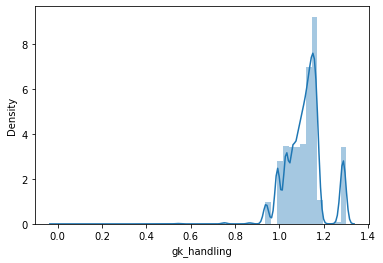

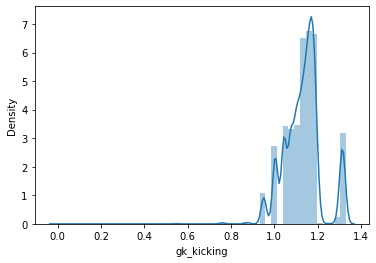

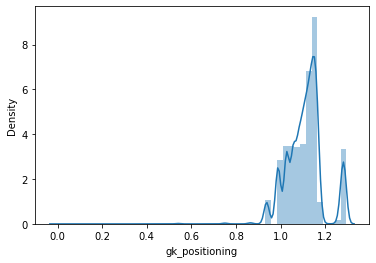

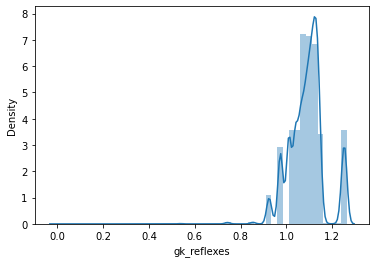

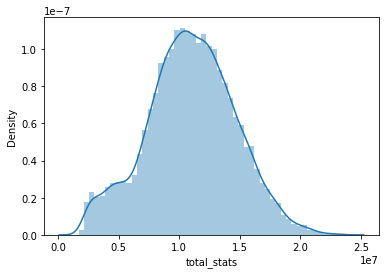

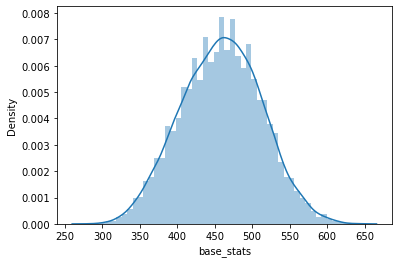

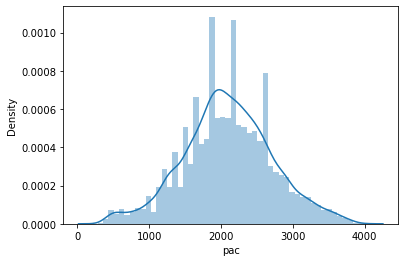

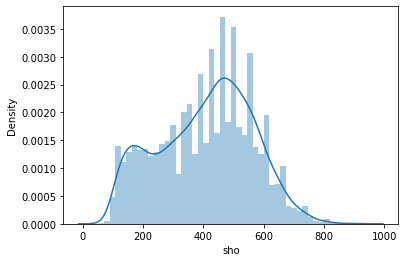

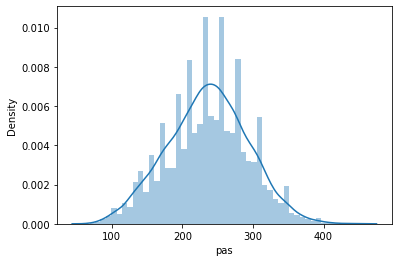

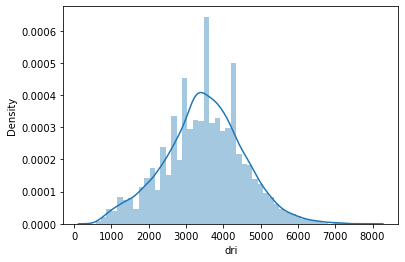

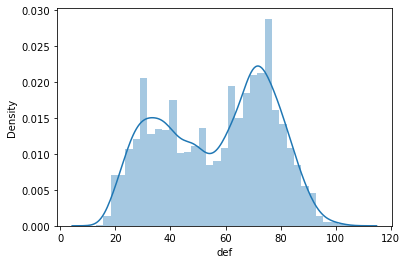

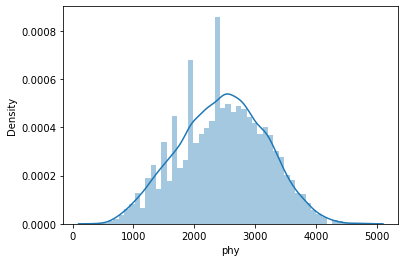

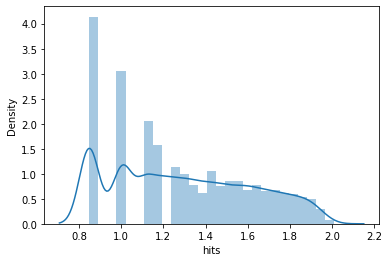

In [34]:
# check for distributions on numericals after scaling
for column in df_1_bx.select_dtypes(np.number).columns:
    sns.distplot(df_1_bx[column])
    plt.show()

In [35]:
# encode categoricals
df_1_bx = pd.get_dummies(df_1_bx, drop_first=True)

In [36]:
df_1_bx

,age,ova,bov,pot,height,weight,growth,value,wage,attacking,...,sm_4★,sm_5★,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium,ir_2 ★,ir_3 ★,ir_4 ★,ir_5 ★
id,,,,,,,,,,,,,,,,,,,,,
16,2.372979,51.506113,49.740147,13.246518,100.357788,7.029014,4.558940,8.261704,6.781879,67918.231812,...,0,0,0,1,0,1,0,0,0,0
41,2.361888,58.182409,57.522112,14.208821,96.589852,7.121771,4.558940,8.978591,7.084837,80780.155315,...,1,0,0,0,0,1,0,0,1,0
80,2.383701,55.521687,54.294509,13.832067,96.589852,7.235665,4.558940,8.773173,7.774113,69983.228137,...,1,0,0,1,0,1,1,0,0,0
330,2.350405,57.518401,56.878205,14.115593,99.104306,7.260214,4.558940,8.978591,6.983510,86705.833065,...,0,0,0,0,1,0,1,0,0,0
1179,2.423303,58.845651,57.522112,14.301428,107.828722,7.722909,4.558940,8.697121,7.738086,5171.813894,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,2.148943,46.780831,47.117395,13.045422,110.300867,7.308527,2.838187,8.230930,6.036580,22793.538890,...,0,0,0,1,0,1,0,0,0,0
259090,2.054324,41.320667,41.822875,12.737776,100.357788,7.367512,5.325697,7.688993,6.284284,36403.955225,...,0,0,0,1,0,1,0,0,0,0
259091,2.054324,41.320667,40.488160,12.841149,99.104306,7.173102,5.763826,7.688993,6.036580,28007.437903,...,0,0,0,1,0,1,0,0,0,0


In [37]:
# X-y split
X = df_1_bx.drop('ova', axis=1)
y = df_1_bx['ova']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# start the model
model = LinearRegression()
# train the model
model.fit(X_train, y_train)

LinearRegression()

### Analyzing results

In [39]:
# get predictions
predictions = model.predict(X_test)

In [41]:
# get metrics
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9908850834818185, 0.329463162020696, 0.4424291994178053)

In [49]:
# MAE and MSE are log transformed
# have to inverse transform
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['ova'])
y_test_unscaled = inv_boxcox(y_test, _ci['ova'])
print(min(predictions))
print(max(predictions))

62.30106290786043
130.91044107031237


In [52]:
mean_absolute_error(y_test_unscaled, predictions), mean_squared_error(y_test_unscaled, predictions, squared=False)

(27.386568547984925, 27.633220839844274)

In [53]:
import math

results = pd.DataFrame()
results['true'] = y_test_unscaled
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
id,,,
244049,57.0,79.856844,22.856844
193910,70.0,98.510620,28.510620
257409,53.0,73.436843,20.436843
219551,62.0,88.367545,26.367545
212750,63.0,87.252058,24.252058
...,...,...,...
245532,65.0,91.445497,26.445497
219985,80.0,114.582371,34.582371
193314,83.0,117.967609,34.967609


In [45]:
results.sort_values('resid', ascending=False).head(10)

,true,pred,resid
id,,,
53352,60.0,65.898476,5.898476
257006,52.0,55.612177,3.612177
226501,60.0,63.476869,3.476869
245291,49.0,52.368018,3.368018
200488,57.0,53.644786,3.355214
245040,52.0,55.286012,3.286012
256918,61.0,57.840616,3.159384
230225,81.0,77.856057,3.143943
140196,68.0,71.100372,3.100372


In [46]:
results.describe()

,true,pred,resid
count,4925.000000,4925.000000,4925.000000
mean,66.917360,66.911819,0.487319
std,6.857896,6.839229,0.436143
min,45.000000,45.626879,0.000296
25%,62.000000,62.419146,0.182441
50%,67.000000,66.699861,0.377418
75%,72.000000,71.674583,0.666351
max,91.000000,90.515457,5.898476


<AxesSubplot:xlabel='true', ylabel='pred'>

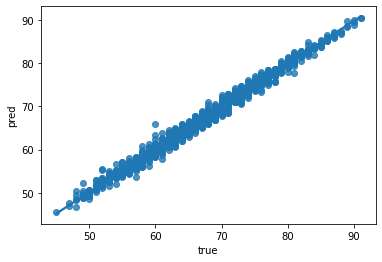

In [47]:
sns.regplot(results['true'], results['pred'])